In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import joblib
pd.set_option('display.max_columns', None)

In [2]:
flights = pd.read_csv('flights.csv', na_values= ['-'])
flights.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20504\3156991577.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv', na_values= ['-'])


(5819079, 31)

In [3]:
flights.head(8)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [5]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [6]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
flights[flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


In [9]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'] & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape

(0, 20)

In [10]:
#na_values.hist(bins=60, figsize=(20,20))

In [11]:
na_values[na_values['ARRIVAL_DELAY']>15]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [12]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


In [13]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    89884
0    15187
Name: count, dtype: int64

In [14]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(5714008, 20)

In [15]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [16]:
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,0,NaN,0.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

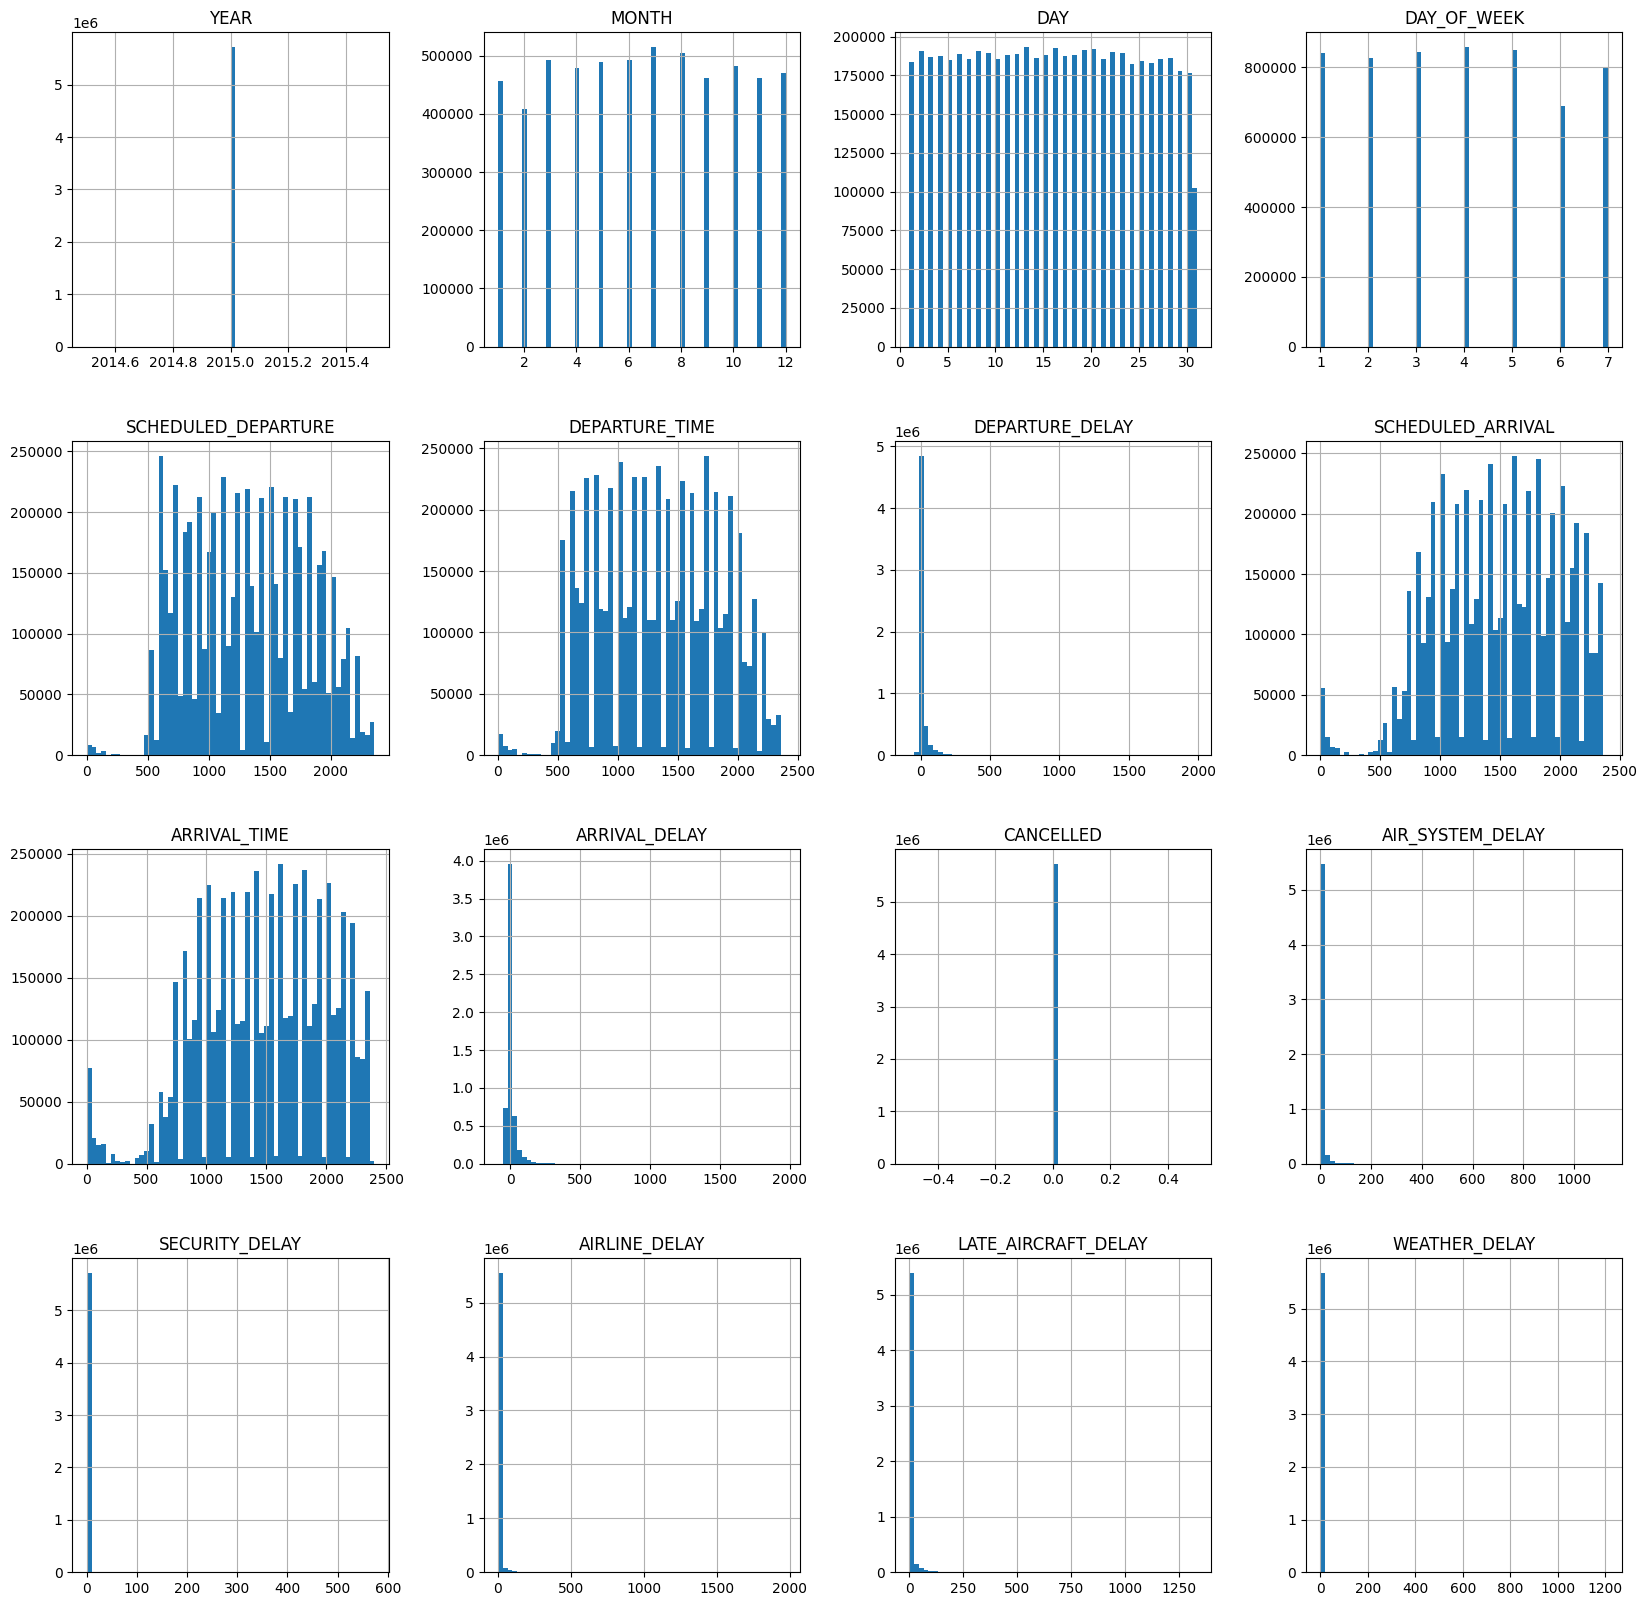

In [17]:
flights.hist(bins=60, figsize=(20,20))

In [18]:
flights[flights['ARRIVAL_DELAY']>1500]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
264495,2015,1,18,7,AA,LAS,LAX,1130,1414.0,1604.0,1246,1519.0,1593.0,0,NaN,0.0,0.0,1593.0,0.0,0.0
337720,2015,1,23,5,AA,BHM,DFW,700,1608.0,1988.0,914,1805.0,1971.0,0,NaN,0.0,0.0,1971.0,0.0,0.0
396544,2015,1,27,2,AA,FAT,DFW,659,850.0,1551.0,1210,1356.0,1546.0,0,NaN,0.0,0.0,1546.0,0.0,0.0
886984,2015,2,28,6,AA,STL,MIA,620,847.0,1587.0,1008,1315.0,1627.0,0,NaN,40.0,0.0,1587.0,0.0,0.0
949876,2015,3,4,3,AA,HNL,LAX,828,1057.0,1589.0,1555,1811.0,1576.0,0,NaN,0.0,0.0,1576.0,0.0,0.0
1047179,2015,3,10,2,AA,SAT,DFW,850,1047.0,1557.0,1000,1154.0,1554.0,0,NaN,0.0,0.0,1554.0,0.0,0.0
1278418,2015,3,24,2,AA,OMA,DFW,1103,1352.0,1609.0,1255,1533.0,1598.0,0,NaN,0.0,0.0,1563.0,35.0,0.0
1290061,2015,3,25,3,AA,SMF,DFW,625,748.0,1523.0,1149,1303.0,1514.0,0,NaN,0.0,0.0,1514.0,0.0,0.0
1841449,2015,4,28,2,AA,SAN,JFK,745,927.0,1542.0,1615,1809.0,1554.0,0,NaN,12.0,0.0,838.0,704.0,0.0
2739880,2015,6,22,1,AA,RIC,DFW,715,837.0,1522.0,920,1028.0,1508.0,0,NaN,0.0,0.0,1508.0,0.0,0.0


In [19]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [20]:
pd.to_numeric(flights['WEATHER_DELAY'])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
5819074    0.0
5819075    0.0
5819076    0.0
5819077    0.0
5819078    0.0
Name: WEATHER_DELAY, Length: 5714008, dtype: float64

In [21]:
flights.iloc[107]

YEAR                    2015
MONTH                      1
DAY                        1
DAY_OF_WEEK                4
AIRLINE                   OO
ORIGIN_AIRPORT           SLC
DESTINATION_AIRPORT      IAH
SCHEDULED_DEPARTURE      540
DEPARTURE_TIME         537.0
DEPARTURE_DELAY         -3.0
SCHEDULED_ARRIVAL        953
ARRIVAL_TIME           937.0
ARRIVAL_DELAY          -16.0
CANCELLED                  0
CANCELLATION_REASON      NaN
AIR_SYSTEM_DELAY         0.0
SECURITY_DELAY           0.0
AIRLINE_DELAY            0.0
LATE_AIRCRAFT_DELAY      0.0
WEATHER_DELAY            0.0
Name: 112, dtype: object

In [22]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [23]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','ORIGIN_AIRPORT',
            'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
            'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]


In [24]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_ARRIVAL        int64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [25]:
flights['AIRLINE'].value_counts()

AIRLINE
WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: count, dtype: int64

In [26]:
len(flights['DESTINATION_AIRPORT'].value_counts())

929

In [27]:
flights['all_delay'] = flights[['ARRIVAL_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
            'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20504\3124835182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['all_delay'] = flights[['ARRIVAL_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay
0,2015,1,1,4,AS,ANC,SEA,5,430,-22.0,0.0,0.0,0.0,0.0,0.0,-22.0
1,2015,1,1,4,AA,LAX,PBI,10,750,-9.0,0.0,0.0,0.0,0.0,0.0,-9.0
2,2015,1,1,4,US,SFO,CLT,20,806,5.0,0.0,0.0,0.0,0.0,0.0,5.0
3,2015,1,1,4,AA,LAX,MIA,20,805,-9.0,0.0,0.0,0.0,0.0,0.0,-9.0
4,2015,1,1,4,AS,SEA,ANC,25,320,-21.0,0.0,0.0,0.0,0.0,0.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,819,-26.0,0.0,0.0,0.0,0.0,0.0,-26.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,446,-16.0,0.0,0.0,0.0,0.0,0.0,-16.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,440,-8.0,0.0,0.0,0.0,0.0,0.0,-8.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,340,-10.0,0.0,0.0,0.0,0.0,0.0,-10.0


In [28]:
flights['delay_reason'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY', 
                        'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                        'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY' )

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20504\321977581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delay_reason'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY',


In [29]:
flights.head(18)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay,delay_reason
0,2015,1,1,4,AS,ANC,SEA,5,430,-22.0,0.0,0.0,0.0,0.0,0.0,-22.0,NO_DELAY
1,2015,1,1,4,AA,LAX,PBI,10,750,-9.0,0.0,0.0,0.0,0.0,0.0,-9.0,NO_DELAY
2,2015,1,1,4,US,SFO,CLT,20,806,5.0,0.0,0.0,0.0,0.0,0.0,5.0,AIR_SYSTEM_DELAY
3,2015,1,1,4,AA,LAX,MIA,20,805,-9.0,0.0,0.0,0.0,0.0,0.0,-9.0,NO_DELAY
4,2015,1,1,4,AS,SEA,ANC,25,320,-21.0,0.0,0.0,0.0,0.0,0.0,-21.0,NO_DELAY
5,2015,1,1,4,DL,SFO,MSP,25,602,8.0,0.0,0.0,0.0,0.0,0.0,8.0,AIR_SYSTEM_DELAY
6,2015,1,1,4,NK,LAS,MSP,25,526,-17.0,0.0,0.0,0.0,0.0,0.0,-17.0,NO_DELAY
7,2015,1,1,4,US,LAX,CLT,30,803,-10.0,0.0,0.0,0.0,0.0,0.0,-10.0,NO_DELAY
8,2015,1,1,4,AA,SFO,DFW,30,545,-13.0,0.0,0.0,0.0,0.0,0.0,-13.0,NO_DELAY
9,2015,1,1,4,DL,LAS,ATL,30,711,-15.0,0.0,0.0,0.0,0.0,0.0,-15.0,NO_DELAY


In [30]:
flights['delay_reason'].value_counts()

delay_reason
NO_DELAY               3627112
AIR_SYSTEM_DELAY       1327241
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

<Axes: >

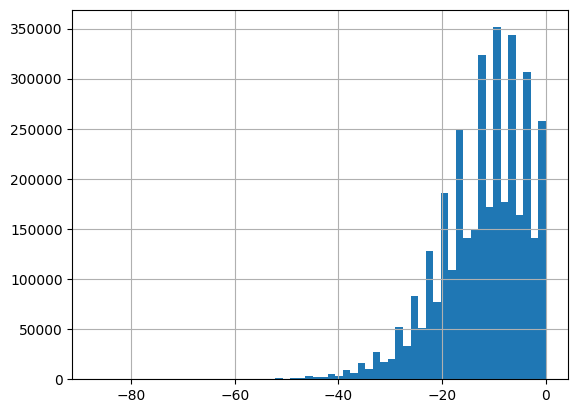

In [31]:
flights[flights['delay_reason'] == 'NO_DELAY']['ARRIVAL_DELAY'].hist(bins=60)

In [32]:
flights.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'all_delay', 'delay_reason'],
      dtype='object')

In [33]:
flights = flights [['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
        'delay_reason']]

In [34]:
X_flights =  flights [['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']]
X_flights = pd.get_dummies(X_flights)

Y_flights =  flights [['delay_reason']]

In [35]:
X_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,430,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,10,750,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,20,806,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,20,805,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,25,320,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,819,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819075,2015,12,31,4,2359,446,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819076,2015,12,31,4,2359,440,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819077,2015,12,31,4,2359,340,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [36]:
##Import Data

In [37]:
#from sklearn.datasets import load_iris
#data = load_iris()

#from sklearn.datasets import fetch_20newsgroups
#newsgroups_train = fetch_20newsgroups()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_flights, Y_flights, test_size=0.30, random_state = 15 )

In [39]:
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.15, random_state = 15 )
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.20, random_state = 15 )

In [40]:
Y_train.value_counts()

delay_reason       
NO_DELAY               2031014
AIR_SYSTEM_DELAY        743058
LATE_AIRCRAFT_DELAY     230182
AIRLINE_DELAY           174356
WEATHER_DELAY            20159
SECURITY_DELAY            1075
Name: count, dtype: int64

In [41]:
#!pip install imbalanced-learn

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)

X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

In [43]:
Y_resampled.value_counts()

delay_reason       
AIRLINE_DELAY          2031014
AIR_SYSTEM_DELAY       2031014
LATE_AIRCRAFT_DELAY    2031014
NO_DELAY               2031014
SECURITY_DELAY         2031014
WEATHER_DELAY          2031014
Name: count, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, Y_train)

# Save the trained classifier
joblib.dump(clf, 'DecisionTreeModel.pkl')

Y_pred = clf.predict(X_test)
Y_pred

array(['NO_DELAY', 'NO_DELAY', 'LATE_AIRCRAFT_DELAY', ..., 'NO_DELAY',
       'AIR_SYSTEM_DELAY', 'NO_DELAY'], dtype=object)

In [45]:
clf.score(X_test, Y_test)

0.5042372461137916

In [46]:
#Evaluation

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, Y_pred, labels = clf.classes_)

In [48]:
cm

array([[  8579,  24654,   9779,  49489,     43,    770],
       [ 27382, 116459,  34205, 216738,    194,   3123],
       [ 10564,  33360,  21327,  56514,     39,   1443],
       [ 60103, 240222,  65111, 717212,    410,   5331],
       [    51,    162,     58,    286,      6,      6],
       [   841,   2976,   1386,   4593,      5,    782]], dtype=int64)

<Axes: >

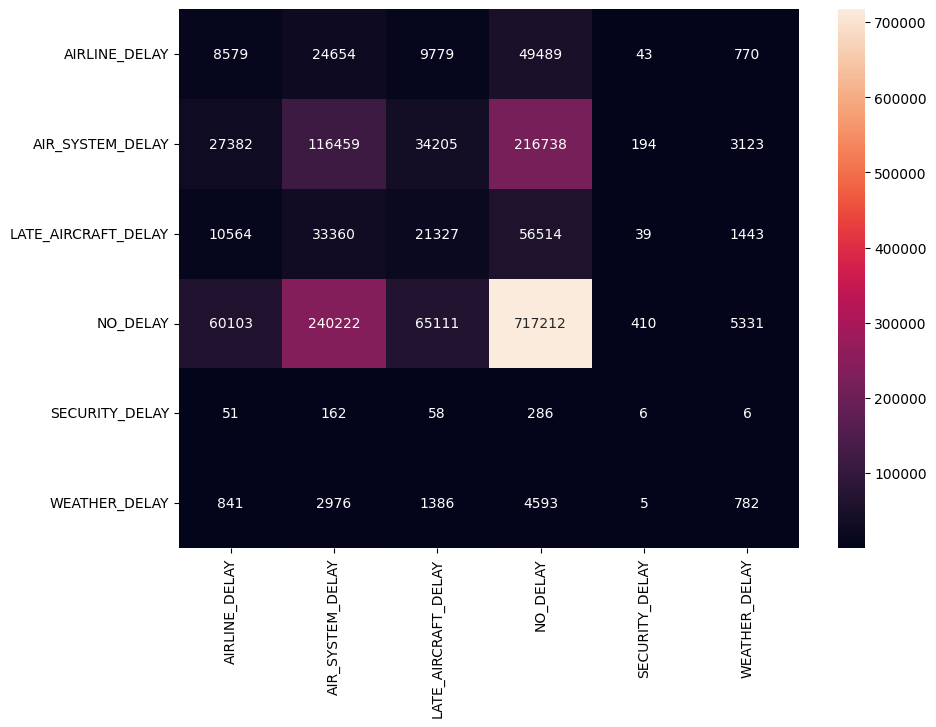

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.08      0.09      0.09     93314
   AIR_SYSTEM_DELAY       0.28      0.29      0.29    398101
LATE_AIRCRAFT_DELAY       0.16      0.17      0.17    123247
           NO_DELAY       0.69      0.66      0.67   1088389
     SECURITY_DELAY       0.01      0.01      0.01       569
      WEATHER_DELAY       0.07      0.07      0.07     10583

           accuracy                           0.50   1714203
          macro avg       0.21      0.22      0.22   1714203
       weighted avg       0.52      0.50      0.51   1714203



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'max_depth':[10,15], 'max_features':["sqrt", "log2"]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)

joblib.dump(clf, 'GridSearchCV_Model.pkl')
clf.fit(X_train, Y_train)

In [52]:
Y_pred = clf.predict(X_test)
Y_pred

array(['NO_DELAY', 'NO_DELAY', 'NO_DELAY', ..., 'NO_DELAY', 'NO_DELAY',
       'NO_DELAY'], dtype=object)

In [53]:
print (classification_report(Y_test, Y_pred))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.24      0.00      0.00     93314
   AIR_SYSTEM_DELAY       0.42      0.01      0.02    398101
LATE_AIRCRAFT_DELAY       0.41      0.01      0.02    123247
           NO_DELAY       0.64      1.00      0.78   1088389
     SECURITY_DELAY       0.00      0.00      0.00       569
      WEATHER_DELAY       0.00      0.00      0.00     10583

           accuracy                           0.64   1714203
          macro avg       0.28      0.17      0.14   1714203
       weighted avg       0.54      0.64      0.50   1714203



C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
